## Unsupersvised Learning 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [16]:
## Clustering: K-Means

from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

**Unsupervised learning** is a type of machine learning where *the algorithm learns patterns and structures from input data without explicit supervision or labeled output*. In unsupervised learning, the algorithm is not provided with target labels during the training process, and its objective is to explore the inherent structure and relationships within the data.

  The main goal of unsupervised learning is to find meaningful patterns, groupings, or representations in the data without any predefined categories or class labels. It is particularly useful when dealing with unlabeled or unstructured data, as it can reveal hidden structures and insights.

There are two common types of unsupervised learning algorithms:

1. Clustering:
     -     Clustering algorithms are used to group similar data points together into clusters based on their feature similarity or distance. The algorithm identifies natural patterns in the data and assigns data points to clusters in a way that points within the same cluster are more similar to each other than to those in other clusters. Examples of clustering algorithms include k-means clustering, hierarchical clustering, and density-based clustering.


2. Dimensionality Reduction:

    - Dimensionality reduction algorithms aim to reduce the number of features or variables in the data while preserving important information. By representing the data in a lower-dimensional space, these algorithms can capture the most essential characteristics and patterns of the original data. Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are common dimensionality reduction techniques.



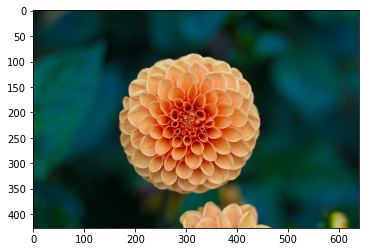

In [17]:
flower = load_sample_image('flower.jpg')
flower = np.array(flower,dtype = np.float64)/255
plt.imshow(flower)

In [18]:
w,h,d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower , (w*h,d))

In [28]:
image_sample = shuffle(image_array,random_state =42)[:1000]

#Fit KMeans
n_colors = 7
kmeans = KMeans(n_clusters=n_colors,random_state = 42).fit(image_sample)

#Get color indices for full image
labels = kmeans.predict(image_array)

C:\Users\deeks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
def reconstruct_image(cluster_centers,labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w,h,d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

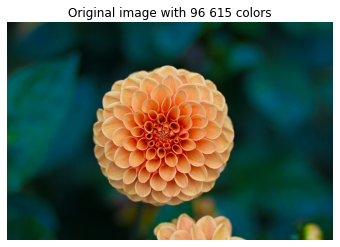

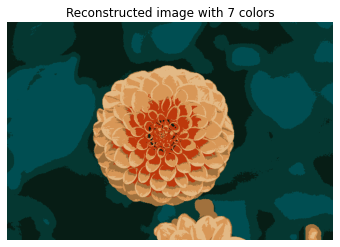

In [30]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_,labels,w,h));


## Principal Component Analysis (PCA)

In [31]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [32]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [33]:
pca = PCA(n_components =2)
X_r = pca.fit(X).transform(X)

In [34]:
print(f'Expalined variance ratio from PCA: {pca.explained_variance_ratio_}')

Expalined variance ratio from PCA: [0.92461872 0.05306648]


In [35]:
colors = ['#003f5c','#bc5090','#ffa600']
lw = 2

Text(0.5, 1.0, 'PCA of Iris Dataset')

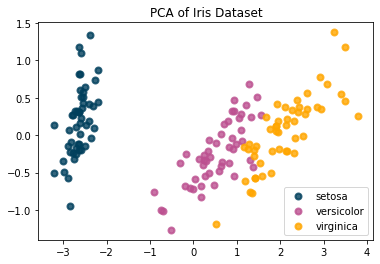

In [36]:
plt.figure()

for color,i,target_name in zip(colors,[0,1,2], target_names):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],color =color,alpha =0.8,lw =lw,label = target_name)
plt.legend(loc='best',shadow=False,scatterpoints =1)
plt.title('PCA of Iris Dataset')